In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.special import expit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  

In [ ]:
data = pd.read_csv("/content/mxmh_survey_results[1].csv")

In [ ]:
len(data)

736

In [ ]:
data.head(20)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


# **Checking Null Values**

In [ ]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [ ]:
data.isnull()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
numerical = data.select_dtypes(['int64','float64'])
numerical

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0


In [ ]:
categorical = data.select_dtypes(object)
categorical

,Timestamp,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
0,8/27/2022 19:29:02,Spotify,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,Never,...,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,NaN,I understand.
1,8/27/2022 19:57:31,Pandora,Yes,No,No,Rock,Yes,No,Sometimes,Never,...,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,NaN,I understand.
2,8/27/2022 21:28:18,Spotify,No,No,No,Video game music,No,Yes,Never,Never,...,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect,I understand.
3,8/27/2022 21:40:40,YouTube Music,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,Never,...,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve,I understand.
4,8/27/2022 21:54:47,Spotify,Yes,No,No,R&B,Yes,No,Never,Never,...,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,Spotify,Yes,Yes,No,Rock,Yes,Yes,Very frequently,Rarely,...,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,Improve,I understand.
732,11/1/2022 22:26:42,Spotify,Yes,Yes,No,Pop,Yes,Yes,Rarely,Rarely,...,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,Improve,I understand.
733,11/3/2022 23:24:38,Other streaming service,Yes,No,Yes,Rap,Yes,No,Rarely,Sometimes,...,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Improve,I understand.
734,11/4/2022 17:31:47,Spotify,Yes,Yes,No,Classical,No,No,Very frequently,Never,...,Never,Never,Never,Never,Never,Never,Never,Sometimes,Improve,I understand.


In [ ]:
X = pd.get_dummies(data)
X

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Timestamp_10/11/2022 15:46:46,Timestamp_10/14/2022 18:01:12,Timestamp_10/14/2022 20:42:26,...,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Never,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Music effects_Improve,Music effects_No effect,Music effects_Worsen,Permissions_I understand.
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


# **Handling Missing Values**

In [ ]:
data['BPM']= data['BPM'].fillna(data['BPM'].median())
data['Age']= data['Age'].fillna(data['Age'].median())
data['Primary streaming service'] = data['Primary streaming service'].fillna(method= 'pad')
data['While working'] = data['While working'].fillna(method= 'pad')
data['Instrumentalist'] = data['Instrumentalist'].fillna(method= 'pad')
data['Composer'] = data['Composer'].fillna(method= 'pad')
data['Foreign languages'] = data['Foreign languages'].fillna(method= 'pad')
data['Music effects'] = data['Music effects'].fillna(method = "bfill")

In [ ]:
data.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

# **Correlation Matrix**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    float64
 2   Primary streaming service     736 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 736 non-null    object 
 5   Instrumentalist               736 non-null    object 
 6   Composer                      736 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             736 non-null    object 
 10  BPM                           736 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
data.shape

(736, 33)

In [ ]:
ds1 = data.drop(['Timestamp','Permissions'], axis = 'columns')
ds1

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [ ]:
 pd.get_dummies(data['Permissions'])

,I understand.
0,1
1,1
2,1
3,1
4,1
...,...
731,1
732,1
733,1
734,1


In [ ]:
ds1.shape

(736, 31)

In [ ]:
ds1.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [ ]:
ds1[ds1.duplicated()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects


In [ ]:
ds1['Primary streaming service'].value_counts()

Spotify                              459
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: Primary streaming service, dtype: int64

In [ ]:
ds1['While working'].value_counts()

Yes    581
No     155
Name: While working, dtype: int64

In [ ]:
ds1['Instrumentalist'].value_counts()

No     501
Yes    235
Name: Instrumentalist, dtype: int64

In [ ]:
ds1['Composer'].value_counts()

No     610
Yes    126
Name: Composer, dtype: int64

In [ ]:
ds1['Fav genre'].value_counts()

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64

In [ ]:
ds1['Exploratory'].value_counts()

Yes    525
No     211
Name: Exploratory, dtype: int64

In [ ]:
ds1['Foreign languages'].value_counts()

Yes    406
No     330
Name: Foreign languages, dtype: int64

In [ ]:
ds1['Frequency [Classical]'].value_counts()

Rarely             259
Sometimes          200
Never              169
Very frequently    108
Name: Frequency [Classical], dtype: int64

In [ ]:
ds1['Frequency [Country]'].value_counts()

Never              343
Rarely             233
Sometimes          111
Very frequently     49
Name: Frequency [Country], dtype: int64

In [ ]:
ds1['Frequency [EDM]'].value_counts()

Never              307
Rarely             194
Sometimes          146
Very frequently     89
Name: Frequency [EDM], dtype: int64

In [ ]:
ds1['Frequency [Folk]'].value_counts()

Never              292
Rarely             221
Sometimes          145
Very frequently     78
Name: Frequency [Folk], dtype: int64

In [ ]:
ds1['Frequency [Gospel]'].value_counts()

Never              535
Rarely             135
Sometimes           52
Very frequently     14
Name: Frequency [Gospel], dtype: int64

In [ ]:
ds1['Frequency [Hip hop]'].value_counts()

Sometimes          218
Rarely             214
Never              181
Very frequently    123
Name: Frequency [Hip hop], dtype: int64

In [ ]:
ds1['Frequency [Jazz]'].value_counts()

Never              261
Rarely             247
Sometimes          175
Very frequently     53
Name: Frequency [Jazz], dtype: int64

In [ ]:
ds1['Frequency [K pop]'].value_counts()

Never              416
Rarely             176
Very frequently     77
Sometimes           67
Name: Frequency [K pop], dtype: int64

In [ ]:
ds1['Frequency [Latin]'].value_counts()

Never              443
Rarely             172
Sometimes           88
Very frequently     33
Name: Frequency [Latin], dtype: int64

In [ ]:
ds1['Frequency [Lofi]'].value_counts()

Never              280
Rarely             211
Sometimes          160
Very frequently     85
Name: Frequency [Lofi], dtype: int64

In [ ]:
ds1['Frequency [Metal]'].value_counts()

Never              264
Rarely             192
Very frequently    146
Sometimes          134
Name: Frequency [Metal], dtype: int64

In [ ]:
ds1['Frequency [Pop]'].value_counts()

Very frequently    277
Sometimes          261
Rarely             142
Never               56
Name: Frequency [Pop], dtype: int64

In [ ]:
ds1['Frequency [R&B]'].value_counts()

Never              225
Rarely             211
Sometimes          184
Very frequently    116
Name: Frequency [R&B], dtype: int64

In [ ]:
ds1['Frequency [Rap]'].value_counts()

Rarely             215
Never              200
Sometimes          195
Very frequently    126
Name: Frequency [Rap], dtype: int64

In [ ]:
ds1['Frequency [Rock]'].value_counts()

Very frequently    330
Sometimes          219
Rarely              96
Never               91
Name: Frequency [Rock], dtype: int64

In [ ]:
ds1['Frequency [Video game music]'].value_counts()

Never              236
Rarely             197
Sometimes          186
Very frequently    117
Name: Frequency [Video game music], dtype: int64

In [ ]:
ds1['Music effects'].value_counts()

Improve      546
No effect    172
Worsen        18
Name: Music effects, dtype: int64

In [ ]:
#assigning label encoder
le = LabelEncoder()
#label encoding 'Fav genre'
#Fav genre:
#8 - Latin
#14 - rock
#15 - Videogames
#6 - Jazz
#12 - R&B
#7 - Kpop
#1 - country
#2 - EDM
#5 - Hip Hop
#11 - Pop
ds1[['Fav genre']]= ds1[['Fav genre']].apply(le.fit_transform)

In [ ]:
ds1[['Primary streaming service']]= ds1[['Primary streaming service']].apply(le.fit_transform)

In [ ]:
ds1[['While working']]= ds1[['While working']].apply(le.fit_transform)

In [ ]:
ds1[['Instrumentalist']]= ds1[['Instrumentalist']].apply(le.fit_transform)

In [ ]:
ds1[['Composer']]= ds1[['Composer']].apply(le.fit_transform)

In [ ]:
ds1[['Exploratory']]= ds1[['Exploratory']].apply(le.fit_transform)

In [ ]:
ds1[['Foreign languages']]= ds1[['Foreign languages']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Classical]']]= ds1[['Frequency [Classical]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Country]']]= ds1[['Frequency [Country]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [EDM]']]= ds1[['Frequency [EDM]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Folk]']]= ds1[['Frequency [Folk]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Gospel]']]= ds1[['Frequency [Gospel]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Hip hop]']]= ds1[['Frequency [Hip hop]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Jazz]']]= ds1[['Frequency [Jazz]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [K pop]']]= ds1[['Frequency [K pop]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Latin]']]= ds1[['Frequency [Latin]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Lofi]']]= ds1[['Frequency [Lofi]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Metal]']]= ds1[['Frequency [Metal]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Pop]']]= ds1[['Frequency [Pop]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [R&B]']]= ds1[['Frequency [R&B]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Rap]']]= ds1[['Frequency [Rap]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Rock]']]= ds1[['Frequency [Rock]']].apply(le.fit_transform)

In [ ]:
ds1[['Frequency [Video game music]']]= ds1[['Frequency [Video game music]']].apply(le.fit_transform)

In [ ]:
ds1[['Music effects']]= ds1[['Music effects']].apply(le.fit_transform)

In [ ]:
print(ds1.shape)
ds1.head(10)

(736, 31)


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,3,2,3,0,2,3.0,0.0,1.0,0.0,1
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,2,2,1,3,1,7.0,2.0,2.0,1.0,1
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,4,5.0,1,1,1,6,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,5,3.0,1,1,0,15,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0
7,21.0,4,1.0,1,0,0,7,1,1,95.0,...,2,2,1,0,1,5.0,3.0,5.0,3.0,0
8,19.0,4,6.0,1,0,0,14,0,0,94.0,...,0,0,0,3,0,2.0,0.0,0.0,0.0,0
9,18.0,1,1.0,1,0,0,12,1,1,155.0,...,2,2,1,2,2,2.0,2.0,5.0,1.0,0


# **EDA**

In [ ]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

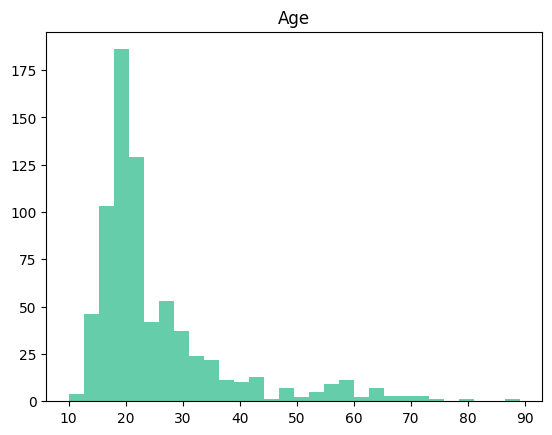

In [ ]:
import numpy as np

data.hist(['Age'], bins=30, color='mediumaquamarine', grid=False)

In [ ]:
data['Age'].value_counts().loc[lambda x : x>50]

18.0    85
19.0    61
17.0    59
21.0    53
Name: Age, dtype: int64

In [ ]:
data['Age'].max()

89.0

The majority of survey participants are in their late teens or early 20s. An intriguing outlier is the one reply who is 89 years old!

The age distribution makes sense, as the survey used to collect data was advertised in discussion forums and social media sites that target this demographic. This may introduce age bias, i.e. influencing which music genres are most popular.

Text(0, 0.5, '')

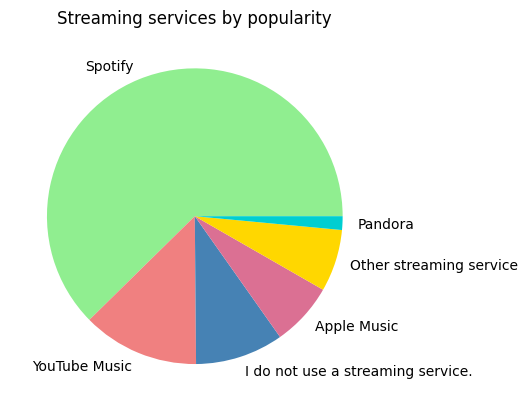

In [ ]:
s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = data['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

In [ ]:
data['Primary streaming service'].value_counts(normalize=True)

Spotify                              0.623641
YouTube Music                        0.127717
I do not use a streaming service.    0.096467
Apple Music                          0.069293
Other streaming service              0.067935
Pandora                              0.014946
Name: Primary streaming service, dtype: float64

Text(0.5, 1.0, 'Streaming services by Age')

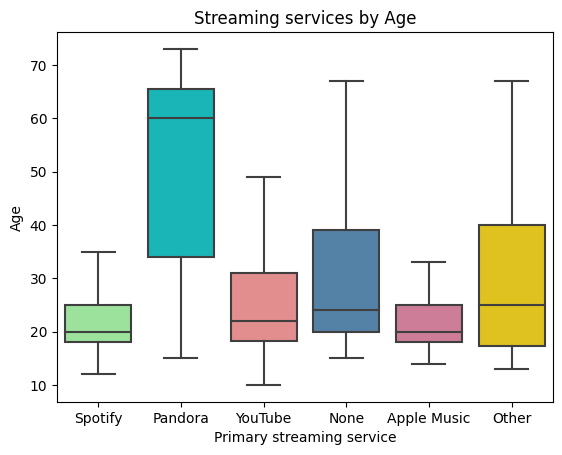

In [ ]:
s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

data.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=data, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

In [ ]:
s_df = data.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           24.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

Spotify is the most popular music streaming service, accounting for 62% of all respondents. Spotify, along with Apple Music, also has a marginally younger userbase than other streaming platforms. Pandora has the oldest user base by far, with the median user age at ~60 years old.

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

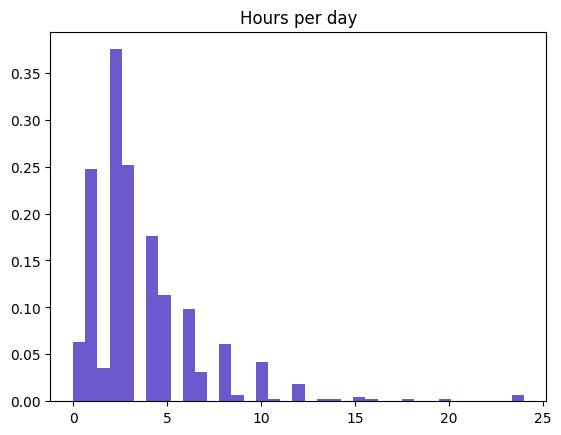

In [ ]:
data.hist(['Hours per day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [ ]:
data['Hours per day'].value_counts().loc[lambda x : x>100]

2.0    173
3.0    120
1.0    117
Name: Hours per day, dtype: int64

The vast majority of respondents listen to music between 0-5 hours per day. After this threshold, the number of respondents that listen to music 5+ hours a day decreases almost exponentially. There are a few respondents that claim to listen to music 24 hours a day.

<Axes: ylabel='Composer'>

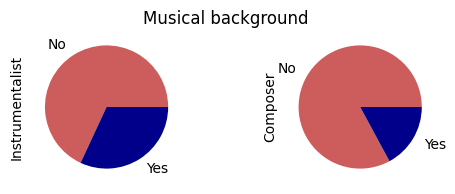

In [ ]:
fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = data['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = data['Composer'].value_counts()
comp.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

Most respondents do not play an instrument. It is even rarer for a respondent to compose music.

In [ ]:
data.replace(['No', 'Yes'],
[0, 1], inplace=True)

<ipython-input-86-2583239dc0ba>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b1 = ax.bar(x-2*width, data[(data.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
<ipython-input-86-2583239dc0ba>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b2 = ax.bar(x-width, data[(data.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
<ipython-input-86-2583239dc0ba>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecate

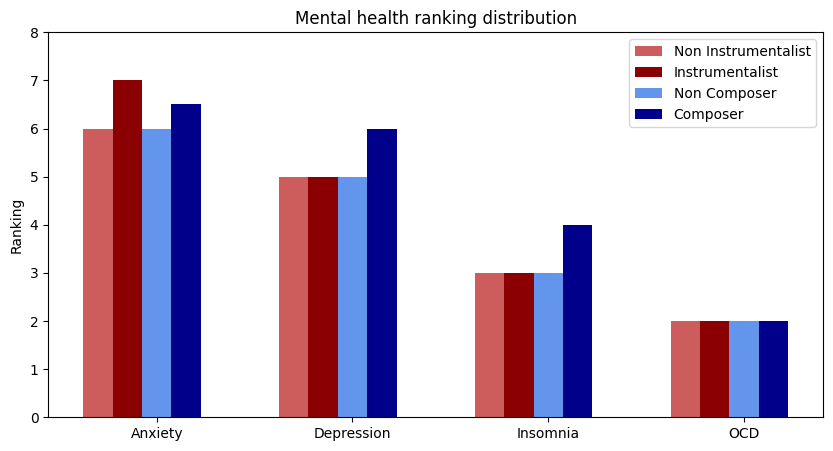

In [ ]:
labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x-2*width, data[(data.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
b2 = ax.bar(x-width, data[(data.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
b3 = ax.bar(x, data[(data.Composer == 0)].median()[-4:], width, color = 'cornflowerblue', label = "Non Composer")
b4 = ax.bar(x+width, data[(data.Composer == 1)].median()[-4:], width, color = 'darkblue', label = "Composer")

ax.set_ylim([0, 8])
ax.set_ylabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

<ipython-input-87-1f380f83933a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = data.corr()


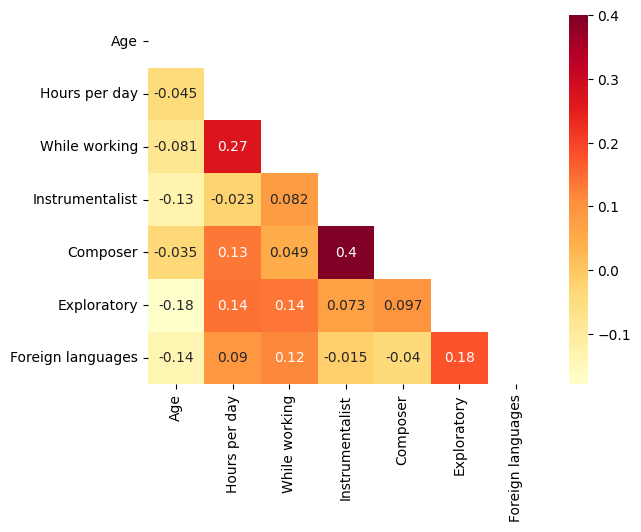

In [ ]:
corr_m = data.corr()
corr_m1 = corr_m.iloc[:-5 , :-5]

mask = np.triu(corr_m1)

sns.heatmap(corr_m1, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

Strong linear trends

As expected, there is a a significant correlation between individuals that play music and individuals that compose music. Similarly, there is also a strong relationship between the total hours listening per day and hours listening while working.

Weaker linear trends: exploratory respondents

The more hours spent listening to music, the more likely an individual actively explores new music. Individuals that listen to music while working are more likely to explore new music and listen to music in different languages. Individuals that listen to music in foreign languages are more likely to explore new music. Older individuals are less inclined to explore new music.

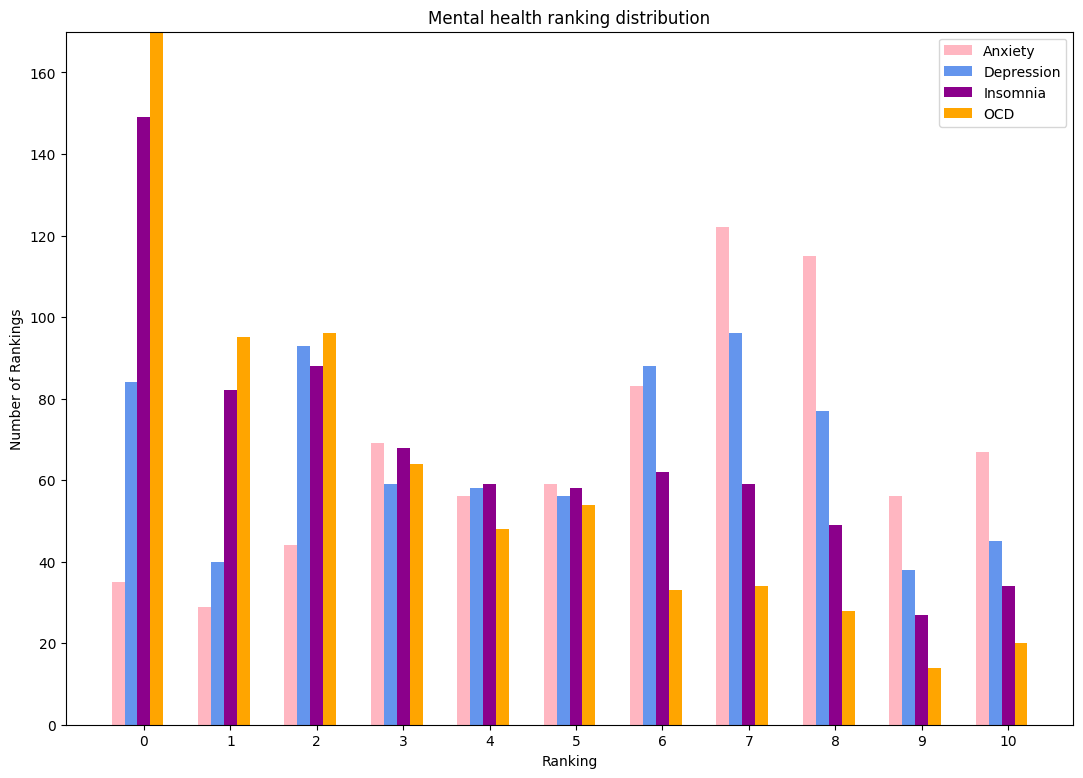

In [ ]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = data[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [ ]:
 #get value for number of OCD rankings at 0

max(disorder_count)

248

In [ ]:
for disorder in m_all:
    d_avg = str(round(data[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


Elevated rankings for depression and anxiety are very common, averaging rankings of 5 and 6 respectively. Between each ranking, popularity also seems to move in the same direction (i.e., from rankings 1 to 2, the popularity of these rankings increases for both anxiety and depression.) Interestingly (albeit concerningly), a given individual is more likely to rank depression at 10 than 0.

Insomnia is somewhat common and distributed more fairly outside of the 0 ranking. However, insomnia rankings do demonstrate a downward trend in popularity as the rankings increase.

With 0 as its mode, OCD is the least common disorder. Similarly to the insomnia rankings, as OCD rankings increase, they tend to decrease in popularity.

<ipython-input-91-80e1cd3be0f1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme = data.loc[(data['Anxiety'] > 8)].mean()[1]
<ipython-input-91-80e1cd3be0f1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme = data.loc[(data['Depression'] > 8)].mean()[1]
<ipython-input-91-80e1cd3be0f1>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns

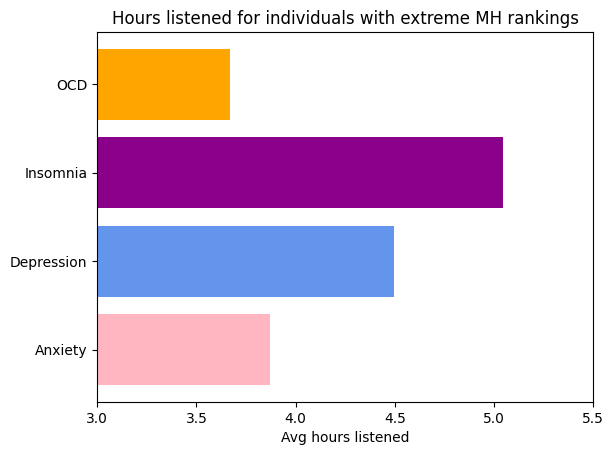

In [ ]:
anxiety_extreme = data.loc[(data['Anxiety'] > 8)].mean()[1]
depression_extreme = data.loc[(data['Depression'] > 8)].mean()[1]
insomnia_extreme = data.loc[(data['Insomnia'] > 8)].mean()[1]
ocd_extreme = data.loc[(data['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with extreme MH rankings")
plt.xlim(3,5.5)
plt.show()

An extreme MH ranking is defined as a ranking of 9 or 10. Extreme insomniacs rack up slightly more listening time compared to individuals with extreme rankings in other categories. Individuals with extreme OCD have a slightly lower listening time. However, these differences may be considered negligible.

Take note that individuals may exist in multiple extreme categories if they answered a 9 or 10 for multiple MH categories.

<ipython-input-92-db656bbcab63>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme2 = data.loc[(data['Anxiety'] < 3)].mean()[1]
<ipython-input-92-db656bbcab63>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme2 = data.loc[(data['Depression'] < 3)].mean()[1]
<ipython-input-92-db656bbcab63>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid colum

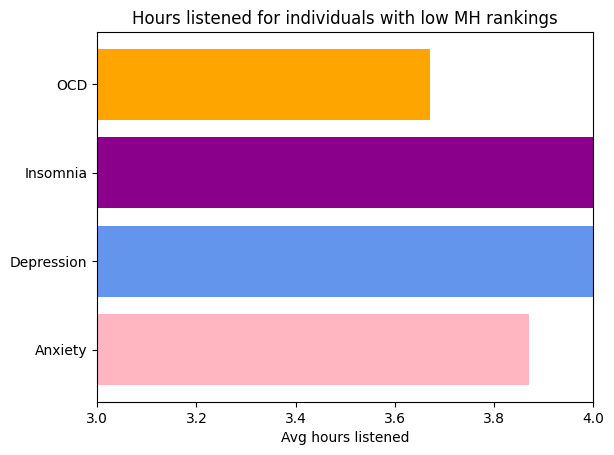

In [ ]:
anxiety_extreme2 = data.loc[(data['Anxiety'] < 3)].mean()[1]
depression_extreme2 = data.loc[(data['Depression'] < 3)].mean()[1]
insomnia_extreme2 = data.loc[(data['Insomnia'] < 3)].mean()[1]
ocd_extreme2 = data.loc[(data['OCD'] < 3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low MH rankings")
plt.xlim(3,4)
plt.show()

A low MH ranking is defined as a ranking of 0, 1, or 2. Interestingly enough, individuals with low insomnia saw a noteworthy decline in average hours listened compared to their extreme counterparts. This was also the case for individuals with low depression.

Take note that individuals may exist in multiple categories if they answered a 0, 1 or 2 for multiple MH categories. Also, take note that the hours scale on this figure is different than the preceding figure.

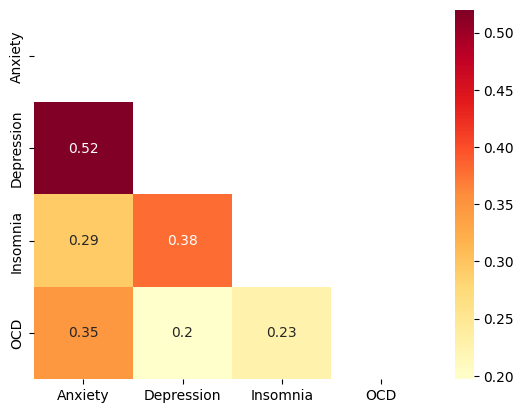

In [ ]:
corr_m2 = corr_m.iloc[8: , 8:]
mask = np.triu(corr_m2)

sns.heatmap(corr_m2, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

All four disorders show significant overlap with each other, with depression and anxiety witnessing the strongest linear correlation. This agrees with our observations from the "Mental health ranking distribution" chart.

OCD is somewhat related to the other categories, but the correlation matrix does not imply as strong of a relationship.

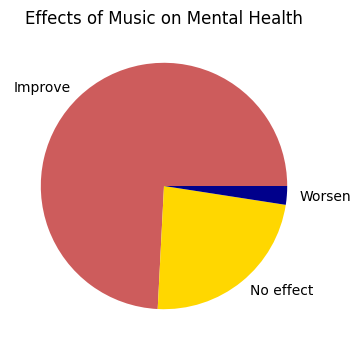

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = data['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');

In [ ]:
effects

Improve      546
No effect    172
Worsen        18
Name: Music effects, dtype: int64

The majority of respondents find that music has a positive impact on their mental health. Of the remaining respondents, only 15 individuals reported music having a negative impact.

Text(0, 0.5, '')

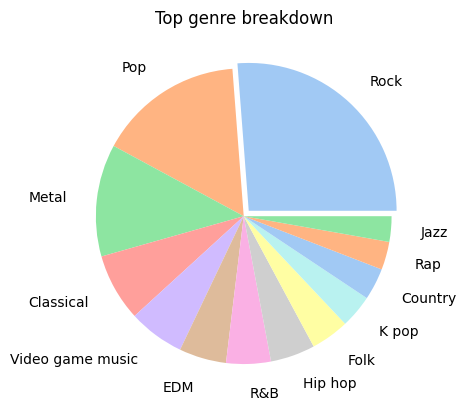

In [ ]:
genre = data["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")

Rock is the most popular genre, being selected as an individual's favorite genre 1 out of 4 times. In terms of popularity, rock is followed by pop and metal. Lofi, Gospel, and Latin music were selected less than 0.14% of the time and do not appear in the above pi chart.

For a genre breakdown by listening frequency, please see the "(In Depth) Genres by Popularity" figure.

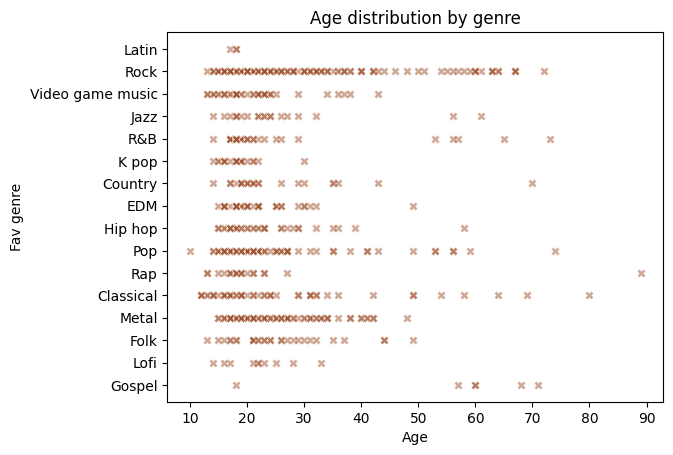

In [ ]:
sns.scatterplot(data=data, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');

Rock has the most diverse range of ages. Classical and Pop listeners also have a wider range of ages compared to other genres. Some music genres, such as K pop and Lofi appear to attract a more specific and younger age group.

ValueError: ignored

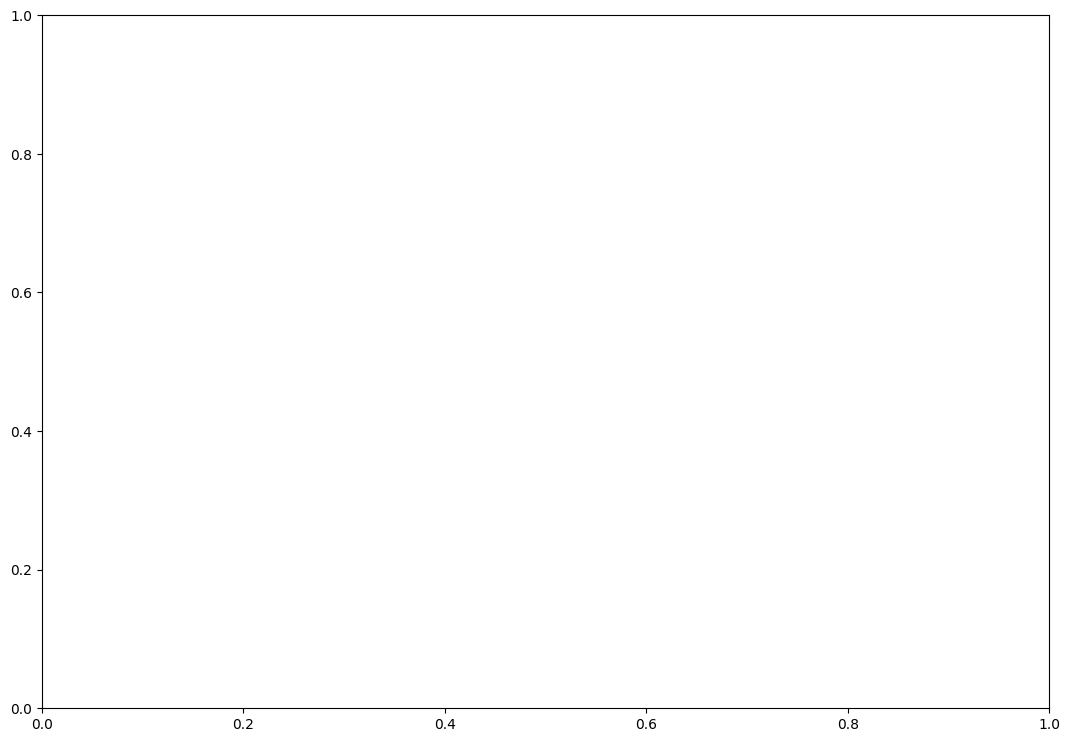

In [ ]:
data.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = data['Fav genre'].unique()
g_all.sort()
fg_df = data.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-width, imp_dist, width, label="Improve", color = 'indianred')
b2 = ax.bar(x, no_eff_dist, width, label="No effect", color = 'gold')
b3 = ax.bar(x+width, wors_dist, width, label="Worsen", color = 'darkblue')

plt.title("Music effects by Favorite Genre")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()

Regardless of genre, the vast majority of respondents agree that music has a positive impact on mental health. This is corroborated by the "Effects of Music on Mental Health" figure. Individuals who selected Gospel and Lofi as their favorite genre unanimously find music beneficial. Individuals who selected Video Game Music as their favorite genre have the most diverse distribution of responses. Roughly 40% of these respondents did not find music beneficial at all, with 10% of respondents reporting a negative impact on their mental health. The only other respondents that found music detrimental were respondents who selected Classical, Pop, Rap, or Rock music as their top genre.

In [ ]:
print(data['BPM'].max())
print(data['BPM'].min())

999999999.0
0.0


The survey system isn't perfect. Online trolls claiming to listen to music with 999999999 BPM may mess up data.

In [ ]:
# filter out noise by creating upper and lower bounds

df = data[(data.BPM < 500) & (data.BPM > 20)]
print(data['BPM'].max())
print(data['BPM'].min())

999999999.0
0.0


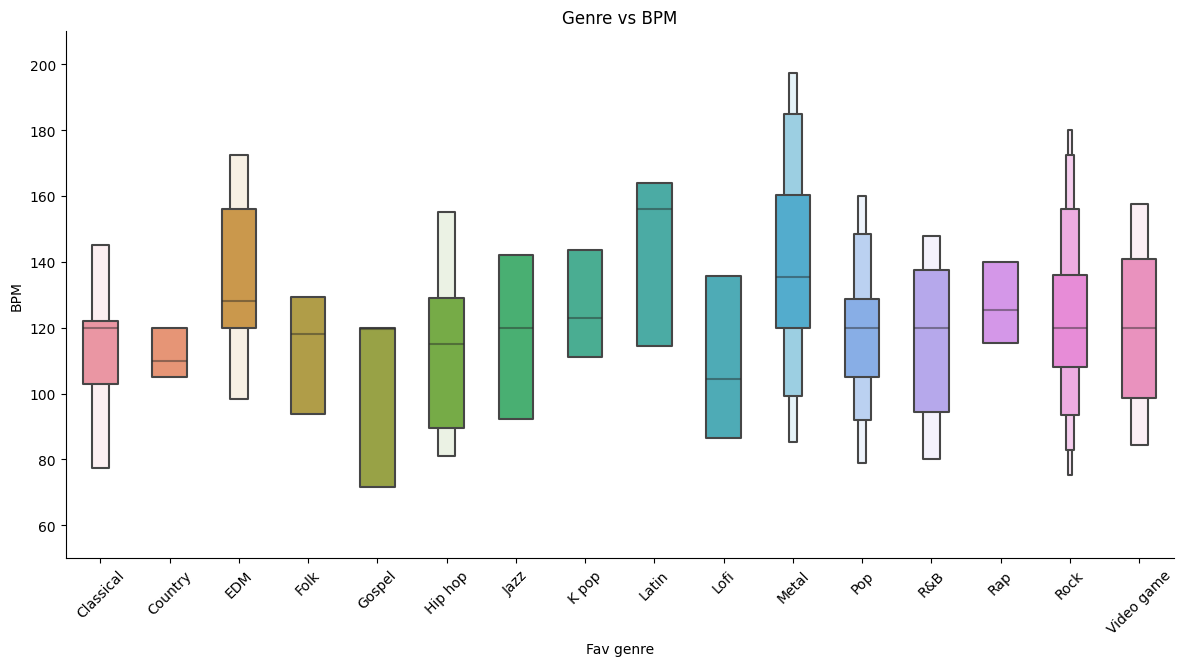

In [ ]:
sns.catplot(
    data=data.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5,
    showfliers=False,
)

plt.xticks(rotation = 45)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

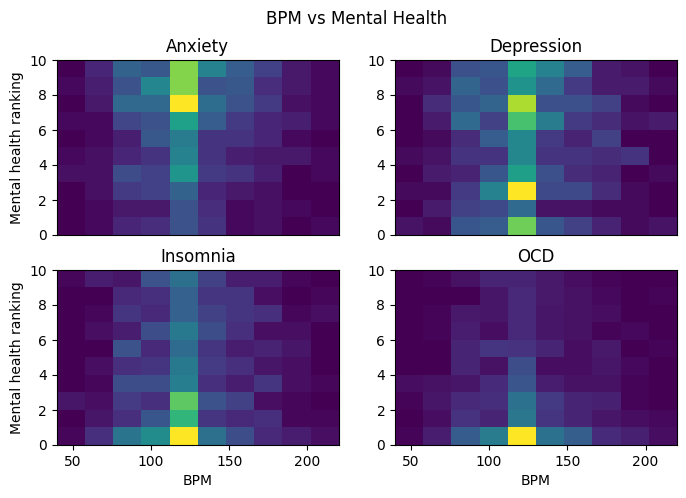

In [ ]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);

In [ ]:
data['MH Score'] = data['Anxiety'] + data['Depression'] + data['Insomnia'] + data['OCD']

In [ ]:
data.nsmallest(50, ['MH Score'])['BPM'].mean()

125.26

In [ ]:
data.nlargest(50, ['MH Score'])['BPM'].mean()

117.76

There is no clear correlation between BPM and mental health rankings.

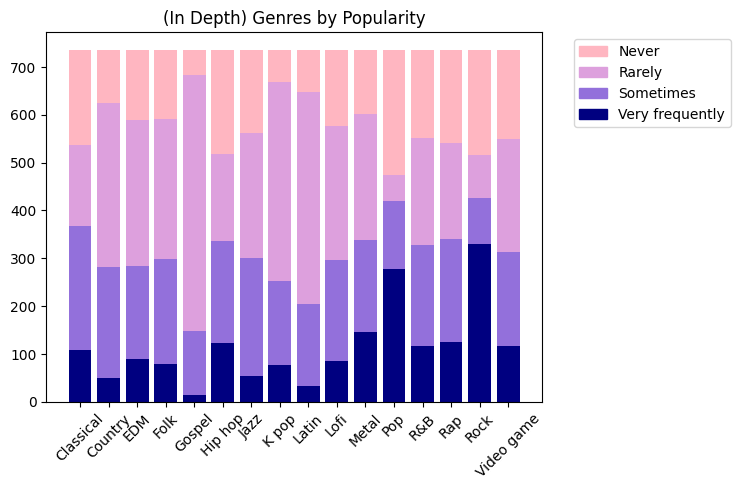

In [ ]:
import matplotlib.patches as mpatches

i = 11

r_dist = []
s_dist = []
n_dist = []
vf_dist = []

while i != 27:
    freq_dist = data.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])  
    
    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    ax.bar(i, r_dist[i], label='Rare', bottom = vf_dist[i] + s_dist[i], color = "plum")
    ax.bar(i, s_dist[i], label='Sometimes', bottom = vf_dist[i], color = "mediumpurple")
    ax.bar(i, n_dist[i], label='Never', bottom=vf_dist[i] + s_dist[i] + r_dist[i], color = "lightpink")
    ax.bar(i, vf_dist[i], label='Very frequently', color = "navy")

ax.set_title('(In Depth) Genres by Popularity')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(g_all)
plt.xticks(rotation = 45)

patch1 = mpatches.Patch(color='lightpink', label='Never')
patch2 = mpatches.Patch(color='plum', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='navy', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [ ]:
import itertools

med_list = []
med_list2 = []
med_list3 = []
med_list4 = []

data.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        [0, 1, 2, 3], inplace=True)

for i in range (11, 27):
    freq_genre = df.columns[i]
    med_list.append(pd.pivot_table(df, values='Anxiety', index=freq_genre, aggfunc="median").values.tolist())
    med_list2.append(pd.pivot_table(df, values='Depression', index=freq_genre, aggfunc="median").values.tolist())
    med_list3.append(pd.pivot_table(df, values='Insomnia', index=freq_genre, aggfunc="median").values.tolist())
    med_list4.append(pd.pivot_table(df, values='OCD', index=freq_genre, aggfunc="median").values.tolist())

def m_vs_gfreq(mlist, fig_name, bd1, bd2):

    r_dist = []
    s_dist = []
    n_dist = []
    vf_dist = []

    for i in range (0, 16):
        n_dist.append(mlist[i][0])
        r_dist.append(mlist[i][1])  
        s_dist.append(mlist[i][2])  
        vf_dist.append(mlist[i][3])  

    labels = g_all
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10, 4))

    b1 = ax.bar(x-2*width, list(itertools.chain(*n_dist)), width, label="Never", color = 'lightpink')
    b2 = ax.bar(x-width, list(itertools.chain(*r_dist)), width, label="Rarely", color = 'plum')
    b3 = ax.bar(x, list(itertools.chain(*s_dist)), width, label="Sometimes", color = 'mediumpurple')
    b4 = ax.bar(x+width, list(itertools.chain(*vf_dist)), width, label="Very Frequently", color = 'navy')

    ax.set_ylim(bd1, bd2)
    ax.set_ylabel('Ranking')
    ax.set_title(fig_name)
    ax.set_xticks(x, labels)
    ax.legend(loc='upper left')

    plt.xticks(rotation = 45)
    plt.show()

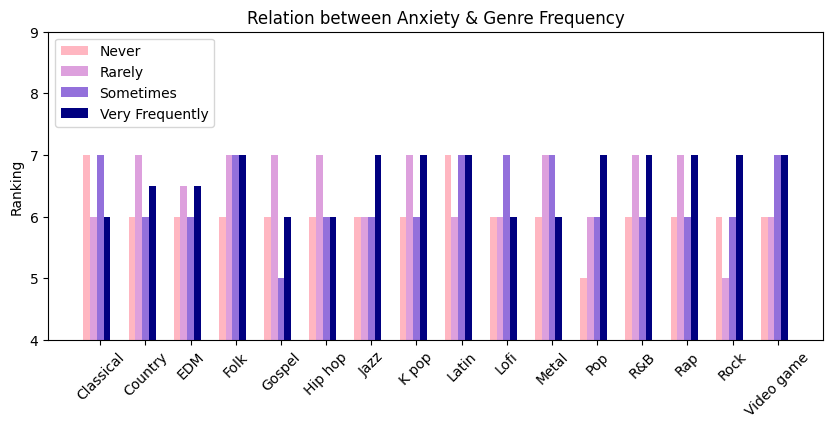

In [ ]:
m_vs_gfreq(med_list, 'Relation between Anxiety & Genre Frequency', 4, 9)

For most genres, a consistent relationship is absent or negligible. Very frequently listening to Country music correlates with a slightly higher anxiety ranking. Never listening to Folk music with a slightly lower anxiety ranking. The most consistent relationship is between anxiety and Pop frequency. As the frequency increases, so do anxiety rankings. For respondents who selected "Sometimes" or "Very Frequently" for EDM, Jazz, or Video game music, respondents also reported a higher anxiety ranking than those that selected "Rarely" or "Never."

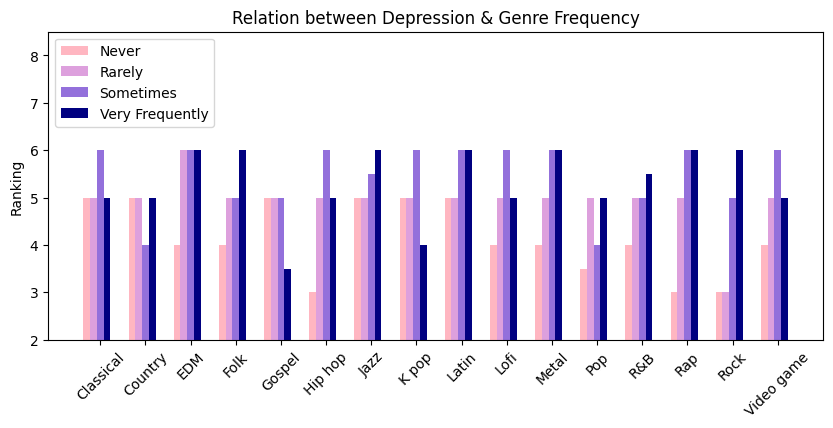

In [ ]:
m_vs_gfreq(med_list2, 'Relation between Depression & Genre Frequency', 2, 8.5)

For most genres, a consistent relationship is absent or negligible. Very frequently listening to Gospel music correlates with lower depression rankings. Never listening to EDM, Hip hop, Metal, Rap, Rock, or Pop correlates with slightly lower depression rankings. The most consistent relationships are between Rock frequency vs depression and R&B vs depression. In both cases, as the frequency increases, so do the depression rankings.

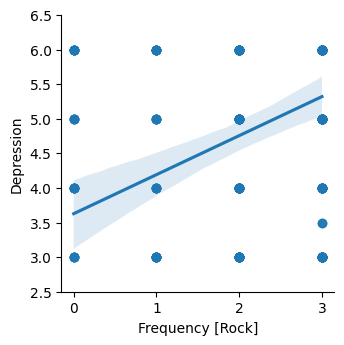

In [ ]:
fig = sns.lmplot(x ='Frequency [Rock]', y ='Depression', data = data, height=3.5)
fig.set(ylim=(2.5, 6.5))

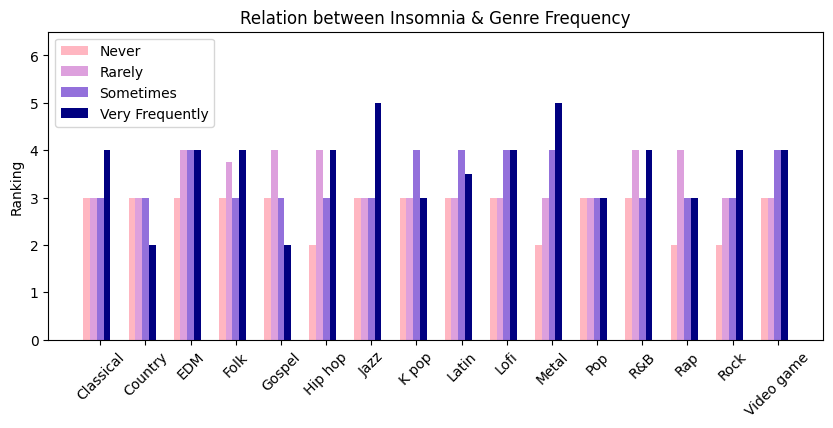

In [ ]:
m_vs_gfreq(med_list3, 'Relation between Insomnia & Genre Frequency', 0, 6.5)

For most genres, a consistent relationship is absent or negligible. Very frequent listeners of Country and Gospel music reported lower insomnia rankings. This is the opposite case for Metal, Lofi, Jazz, Rock, and, less apparently, K Pop. For these genres, higher frequencies correlated with higher insomnia rankings. Very frequent listeners of Folk, Jazz, and Lofi reported the highest insomnia rankings.

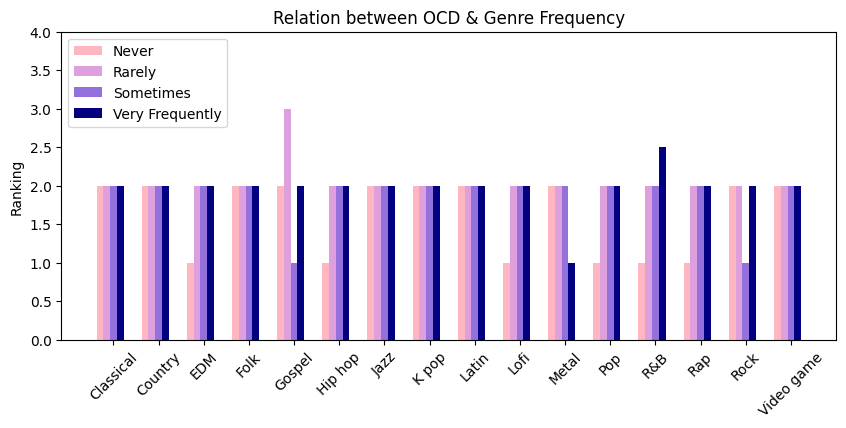

In [ ]:
m_vs_gfreq(med_list4, 'Relation between OCD & Genre Frequency', 0,4)

For most genres, a consistent relationship is absent or negligible. Very frequently listening to R&B correlates with a higher OCD ranking.

In [ ]:
print('Favorite genres of highest combined MH scorers:')
data.nlargest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of highest combined MH scorers:


Rock          17
Metal         10
Pop            9
EDM            6
R&B            3
Folk           2
K pop          2
Video game     2
Lofi           2
Jazz           2
Country        1
Classical      1
Hip hop        1
Gospel         1
Rap            1
Name: Fav genre, dtype: int64

In [ ]:
print('Favorite genres of lowest combined MH scorers:')
data.nsmallest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of lowest combined MH scorers:


Rock          14
Metal          8
Classical      7
Pop            6
Country        6
R&B            5
EDM            3
Gospel         2
Jazz           2
K pop          2
Video game     2
Rap            1
Folk           1
Latin          1
Name: Fav genre, dtype: int64

Take note of the overall genre popularity, as outlined in the "Top genre breakdown" figure. Higher value counts for genres such as Rock, Pop, and Metal should be expected.

Considering that Latin and Gospel music accounted for a very small portion of reported favorite genres, it is noteworthy that both of these genres appear in the second list. This suggests that Latin and Gospel music may have a significant correlation with lower MH scores. This is somewhat corroborated by plots generated by the m_vs_gfreq function.

(Of course, the diminished population of Latin and Gospel music lovers means these results are more susceptible to noise.)

Country and Rap also appear more frequently for the lowest MH scorers.

On the other hand, EDM appears slightly more frequently for the highest MH scorers, which is expected as listening to EDM more frequently generally leads to higher MH scores in all categories.

It is further of interest to note that Lofi does not appear in the second list, but appears 3 times in the first. As outlined in the "Relation between Insomnia & Genre Frequency" figure, Lofi enjoyers tended to suffer more from insomnia which may explain this finding.

Surprising results

While it is recognized that Rock is the most popular genre, its above value counts are surprising. According to the m_vs_gfreg plots, avid Rock listeners have higher rankings for both Insomnia and Depression. Still, Rock has comparable value counts in both lists.

Similarly, listening to Jazz very frequently pointed towards higher rankings for Anxiety, Depression, and especially Insomnia. Yet, Jazz appears in both lists with similar value counts.

Conclusions There are numerous small patterns between music taste and mental health. However, some factors (such as BPM), do not play a significant role. Individual genres also have varying degrees of influence, which is dependent on the MH category. For example, the frequency that an individual listens to Rock is more related to Depression rankings than the frequency for Lofi. However, Lofi is related to higher Insomnia rankings.

Thus, it would be inaccurate to deem one genre to be the "most dangerous."

In [ ]:
data.nlargest(1, ['MH Score'])['Fav genre']

639    Metal
Name: Fav genre, dtype: object

However, Folk music was the favorite genre for the top combined MH scorer. (Take this with a grain of salt, as a single instance does not generalize to the whole dataset.)

In [ ]:
ds1.head(20)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,3,2,3,0,2,3.0,0.0,1.0,0.0,1
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,2,2,1,3,1,7.0,2.0,2.0,1.0,1
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,4,5.0,1,1,1,6,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,5,3.0,1,1,0,15,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0
7,21.0,4,1.0,1,0,0,7,1,1,95.0,...,2,2,1,0,1,5.0,3.0,5.0,3.0,0
8,19.0,4,6.0,1,0,0,14,0,0,94.0,...,0,0,0,3,0,2.0,0.0,0.0,0.0,0
9,18.0,1,1.0,1,0,0,12,1,1,155.0,...,2,2,1,2,2,2.0,2.0,5.0,1.0,0


In [ ]:
ds1.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

# ***Feature*** ***Scalling*** 

In [ ]:
Y = ds1['Music effects']
Y.head(30)

0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    2
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
Name: Music effects, dtype: int64

In [ ]:
X = ds1.drop(["Music effects"], axis = 'columns')

In [ ]:
X.head(30)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,0,3,2,3,0,2,3.0,0.0,1.0,0.0
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,0,2,2,1,3,1,7.0,2.0,2.0,1.0
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,2,1,0,1,1,3,7.0,7.0,10.0,2.0
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,0,2,2,0,0,0,9.0,7.0,3.0,3.0
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,0,2,3,3,0,1,7.0,2.0,5.0,9.0
5,18.0,4,5.0,1,1,1,6,1,1,86.0,...,1,3,3,3,3,0,8.0,8.0,7.0,7.0
6,18.0,5,3.0,1,1,0,15,1,1,66.0,...,1,1,1,0,0,2,4.0,8.0,6.0,0.0
7,21.0,4,1.0,1,0,0,7,1,1,95.0,...,0,2,2,1,0,1,5.0,3.0,5.0,3.0
8,19.0,4,6.0,1,0,0,14,0,0,94.0,...,3,0,0,0,3,0,2.0,0.0,0.0,0.0
9,18.0,1,1.0,1,0,0,12,1,1,155.0,...,0,2,2,1,2,2,2.0,2.0,5.0,1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(736, 30) (588, 30) (148, 30)


In [ ]:
len(Y)

736

In [ ]:
X.shape

(736, 30)

In [ ]:
Y.shape


(736,)

In [ ]:
column_scale = ['Age','Primary streaming service','Hours per day','While working','Instrumentalist','Composer','Fav genre','Exploratory','Foreign languages','BPM','Frequency [Classical]','Frequency [Country]','Frequency [EDM]','Frequency [Folk]','Frequency [Gospel]','Frequency [Hip hop]','Frequency [Jazz]','Frequency [K pop]','Frequency [Latin]','Frequency [Lofi]','Frequency [Metal]','Frequency [Pop]','Frequency [R&B]','Frequency [Rap]','Frequency [Rock]','Frequency [Video game music]','Anxiety','Depression','Insomnia','OCD']

In [ ]:
len(column_scale)

30

In [ ]:
standard = MinMaxScaler()

In [ ]:
standard.fit(X_train[column_scale])

MinMaxScaler()

In [ ]:
X_train[column_scale] = standard.transform(X_train[column_scale])
X_test[column_scale] = standard.transform(X_test[column_scale])

In [ ]:
X_train.head(20)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
647,0.194805,1.0,0.125000,1.0,0.0,0.0,0.733333,0.0,0.0,1.130000e-07,...,0.333333,1.000000,1.000000,0.666667,0.666667,0.333333,0.7,0.2,0.0,0.1
680,0.077922,0.8,0.166667,0.0,0.0,0.0,0.800000,1.0,1.0,8.000000e-08,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.8,0.7,0.2,0.6
595,0.116883,0.8,0.333333,1.0,0.0,0.0,0.600000,1.0,1.0,1.620000e-07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.6,0.5,0.9,0.8
453,0.636364,0.6,0.083333,1.0,0.0,0.0,0.933333,1.0,0.0,9.400000e-08,...,0.666667,0.666667,0.333333,0.000000,0.666667,0.000000,0.2,0.2,0.2,0.0
211,0.103896,0.8,0.125000,0.0,0.0,0.0,0.933333,1.0,0.0,1.360000e-07,...,1.000000,1.000000,0.000000,0.666667,1.000000,0.333333,1.0,1.0,0.7,0.3
267,0.116883,0.8,0.041667,1.0,1.0,0.0,0.733333,1.0,1.0,8.500000e-08,...,1.000000,1.000000,0.666667,1.000000,0.666667,1.000000,0.5,0.1,0.0,0.0
409,0.038961,0.8,0.125000,1.0,1.0,1.0,0.000000,1.0,0.0,1.180000e-07,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.666667,0.9,0.6,0.8,0.5
136,0.090909,0.8,0.125000,1.0,1.0,0.0,0.000000,1.0,0.0,1.220000e-07,...,0.000000,1.000000,0.000000,0.000000,0.333333,0.666667,0.3,0.3,0.1,0.2
558,0.064935,0.8,0.083333,1.0,1.0,1.0,0.800000,1.0,0.0,1.200000e-07,...,0.333333,1.000000,1.000000,0.333333,0.666667,0.000000,0.3,0.3,0.1,0.0
489,0.168831,0.8,0.041667,1.0,0.0,0.0,0.733333,1.0,1.0,8.000000e-08,...,1.000000,1.000000,0.333333,0.666667,0.666667,0.666667,0.7,0.6,0.5,0.5


#***Logistic Regression***

In [ ]:
l1_ratio = [float(x) for x in np.linspace(start = 0, stop = 1, num = 10)]
penalty = ['l1', 'l2', 'elasticnet']
solver = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']

In [ ]:
random_grid = {'l1_ratio': l1_ratio,
               'penalty': penalty,
               'solver': solver}

In [ ]:
print(random_grid)

{'l1_ratio': [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}


In [ ]:
lr_clf = LogisticRegression()
lr_clf=RandomizedSearchCV(estimator=lr_clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [ ]:
lr_clf.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
141 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'l1_ratio': [0.0, 0.1111111111111111,
                                                     0.2222222222222222,
                                                     0.3333333333333333,
                                                     0.4444444444444444,
                                                     0.5555555555555556,
                                                     0.6666666666666666,
                                                     0.7777777777777777,
                                                     0.8888888888888888, 1.0],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [ ]:
lr_clf.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'l1_ratio': 1.0}

In [ ]:
lr_clf = LogisticRegression(solver= 'liblinear', penalty= 'l1', l1_ratio= 0.1111111111111111)
lr_clf.fit(X_train, Y_train)
y_pred = lr_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print("Train Accuracy: ", accuracy_score(Y_train, lr_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       113
           1       0.60      0.10      0.17        31
           2       0.00      0.00      0.00         4

    accuracy                           0.77       148
   macro avg       0.46      0.36      0.34       148
weighted avg       0.72      0.77      0.70       148

Train Accuracy:  0.7517006802721088
Test Accuracy:  0.7702702702702703


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

In [ ]:
# Plotting Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
# plt.rcParams.update({'font.size': 22})

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=lr_clf.classes_, title='Test Set Confusion Matrix')

NameError: ignored

<Figure size 1000x500 with 0 Axes>

ValueError: ignored

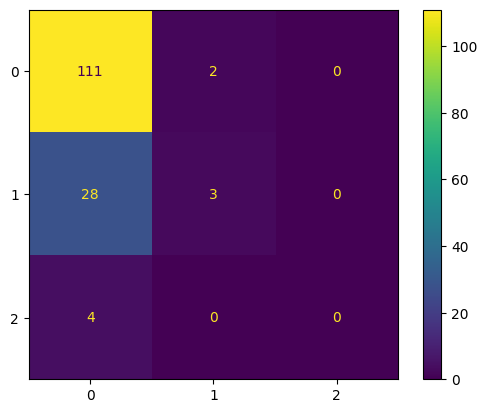

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

<Axes: >

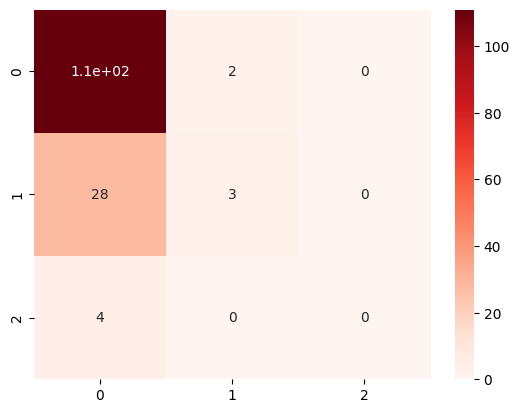

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, cmap = "Reds", annot = True)

# **Support Vector Machine**

In [ ]:
clf = svm.SVC() 

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(Y_test, grid_predictions))
print("Train Accuracy: ", accuracy_score(Y_train, grid.predict(X_train)))
print("Test Accuracy: ", accuracy_score(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       113
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         4

    accuracy                           0.76       148
   macro avg       0.25      0.33      0.29       148
weighted avg       0.58      0.76      0.66       148

Train Accuracy:  0.7363945578231292
Test Accuracy:  0.7635135135135135


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Plotting Confusion Matrix
cm1 = confusion_matrix(Y_test, grid_predictions)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,5))
plot_confusion_matrix(cm, classes=clf.classes_, title='Test Set Confusion Matrix')

NameError: ignored

<Figure size 1500x500 with 0 Axes>

<Axes: >

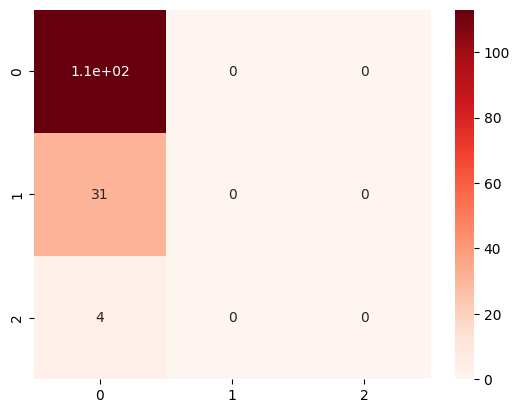

In [ ]:
cm1 = confusion_matrix(Y_test, grid_predictions)
sns.heatmap(cm1, cmap = "Reds", annot = True)

# **Naive Bias Classifier**

In [ ]:
classifier = GaussianNB()  
classifier.fit(X_train, Y_train)  

GaussianNB()

In [ ]:
classifier_predictions = classifier.predict(X_test)
  
# print classification report
print(classification_report(Y_test, classifier_predictions))
print("Train Accuracy: ", accuracy_score(Y_train, classifier.predict(X_train)))
print("Test Accuracy: ", accuracy_score(Y_test, classifier_predictions))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       113
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         4

    accuracy                           0.70       148
   macro avg       0.25      0.31      0.28       148
weighted avg       0.58      0.70      0.64       148

Train Accuracy:  0.6989795918367347
Test Accuracy:  0.7027027027027027


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

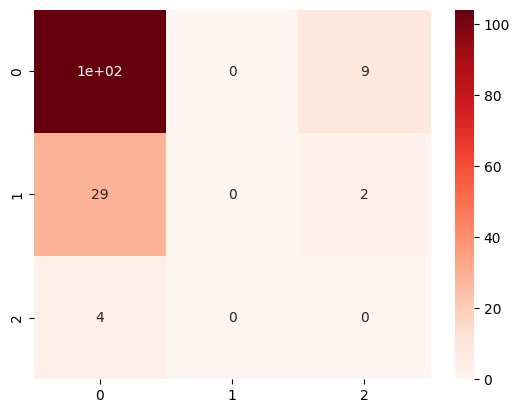

In [ ]:
cm2 = confusion_matrix(Y_test, classifier_predictions)
sns.heatmap(cm2, cmap = "Reds", annot = True)